In [3]:
import sys
sys.path.append("../src")
from data_explore import (
 load_fi_data, explore_impact_mechanics, summarize_pillars,load_reference_codes,validate_records,analyze_impact_links,get_record_counts,get_temporal_coverage,list_unique_indicators,DataAnalyzer
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the Excel file
data = load_fi_data("../data/raw/ethiopia_fi_unified_data.xlsx")
df_main = data['unified_data']
df_impacts = data['impact_links']

# Segment record types in Sheet 1
observations = df_main[df_main['record_type'] == 'observation']
events = df_main[df_main['record_type'] == 'event']
targets = df_main[df_main['record_type'] == 'target']

print(f"Main Data: {len(observations)} Obs, {len(events)} Events, {len(targets)} Targets")
print(f"Impact Links: {len(df_impacts)} modeled relationships found in 'Impact_sheet'")

Main Data: 30 Obs, 10 Events, 3 Targets
Impact Links: 14 modeled relationships found in 'Impact_sheet'


In [6]:
# Map events to their indicators via parent_id in Impact_sheet
mapping = explore_impact_mechanics(data)

# Analyze how 'Product Launches' affect indicators
print("Sample Event-to-Indicator Mapping:")
display(mapping[['parent_id', 'indicator_event', 'indicator_link', 'impact_magnitude']].head())

Sample Event-to-Indicator Mapping:


,parent_id,indicator_event,indicator_link,impact_magnitude
0,EVT_0001,Telebirr Launch,Telebirr effect on Account Ownership,high
1,EVT_0001,Telebirr Launch,Telebirr effect on Telebirr Users,high
2,EVT_0001,Telebirr Launch,Telebirr effect on P2P Transactions,high
3,EVT_0002,Safaricom Ethiopia Commercial Launch,Safaricom effect on 4G Coverage,medium
4,EVT_0002,Safaricom Ethiopia Commercial Launch,Safaricom effect on Data Affordability,medium


In [7]:
# Load Reference Codes
ref_codes = load_reference_codes("../data/raw/reference_codes.xlsx")

# Run Validation
validation_results = validate_records(df_main, ref_codes)

if validation_results['invalid_indicator_count'] > 0:
    print(f"⚠️ Warning: Found {validation_results['invalid_indicator_count']} records with invalid indicator codes.")
    print(f"Check these codes: {validation_results['flagged_indicator_codes']}")
else:
    print("✅ Schema Check Passed: All codes align with reference_codes.csv")

⚠️ Warning: Found 43 records with invalid indicator codes.
Check these codes: ['ACC_OWNERSHIP', 'ACC_MM_ACCOUNT', 'ACC_4G_COV', 'ACC_MOBILE_PEN', 'ACC_FAYDA', 'USG_P2P_COUNT', 'USG_P2P_VALUE', 'USG_ATM_COUNT', 'USG_ATM_VALUE', 'USG_CROSSOVER', 'USG_TELEBIRR_USERS', 'USG_TELEBIRR_VALUE', 'USG_MPESA_USERS', 'USG_MPESA_ACTIVE', 'USG_ACTIVE_RATE', 'AFF_DATA_INCOME', 'GEN_GAP_ACC', 'GEN_MM_SHARE', 'GEN_GAP_MOBILE', 'EVT_TELEBIRR', 'EVT_SAFARICOM', 'EVT_MPESA', 'EVT_FAYDA', 'EVT_FX_REFORM', 'EVT_CROSSOVER', 'EVT_MPESA_INTEROP', 'EVT_ETHIOPAY', 'EVT_NFIS2', 'EVT_SAFCOM_PRICE']


Count Records by Dimensions

In [8]:
counts = get_record_counts(df_main)
for dim, val in counts.items():
    print(f"--- {dim.upper()} ---")
    print(val)

--- RECORD_TYPE ---
{'observation': 30, 'event': 10, 'target': 3}
--- PILLAR ---
{'ACCESS': 16, 'USAGE': 11, nan: 10, 'GENDER': 5, 'AFFORDABILITY': 1}
--- SOURCE_TYPE ---
{'operator': 15, 'survey': 10, 'regulator': 7, 'research': 4, 'policy': 3, 'calculated': 2, 'news': 2}
--- CONFIDENCE ---
{'high': 40, 'medium': 3}


Temporal Range and Indicators

In [9]:
start, end = get_temporal_coverage(df_main)
print(f"Data Timeline: {start.year} to {end.year}")

indicator_summary = list_unique_indicators(df_main)
display(indicator_summary)

Data Timeline: 2014 to 2025


,record_count,latest_value,unit
indicator_code,,,
ACC_4G_COV,2,7.080000e+01,%
ACC_FAYDA,4,9.000000e+07,people
ACC_MM_ACCOUNT,2,9.450000e+00,%
ACC_MOBILE_PEN,1,6.140000e+01,%
ACC_OWNERSHIP,7,7.000000e+01,%
AFF_DATA_INCOME,1,2.000000e+00,% of GNI
EVT_CROSSOVER,1,NaN,None
EVT_ETHIOPAY,1,NaN,None
EVT_FAYDA,1,NaN,None


Catalog Events and Dates

In [10]:
events_catalog = df_main[df_main['record_type'] == 'event'][
    ['observation_date', 'indicator', 'notes', 'source_name']
].sort_values('observation_date')

print("Major Cataloged Events:")
display(events_catalog)

Major Cataloged Events:


,observation_date,indicator,notes,source_name
33,2021-05-17,Telebirr Launch,NaN,Ethio Telecom
41,2021-09-01,NFIS-II Strategy Launch,NaN,NBE
34,2022-08-01,Safaricom Ethiopia Commercial Launch,NaN,News
35,2023-08-01,M-Pesa Ethiopia Launch,NaN,Safaricom
36,2024-01-01,Fayda Digital ID Program Rollout,NaN,NIDP
37,2024-07-29,Foreign Exchange Liberalization,NaN,NBE
38,2024-10-01,P2P Transaction Count Surpasses ATM,NaN,EthSwitch
39,2025-10-27,M-Pesa EthSwitch Integration,NaN,EthSwitch
42,2025-12-15,Safaricom Ethiopia Price Increase,NaN,News
40,2025-12-18,EthioPay Instant Payment System Launch,NaN,NBE/EthSwitch


Review Impact Relationships

In [11]:
# Using the function we built in Task 1
impact_summary = df_impacts.groupby(['impact_direction', 'impact_magnitude']).size().unstack(fill_value=0)

print("Distribution of Modeled Impacts:")
display(impact_summary)

# Example: View relationships with a 'High' impact magnitude
high_impacts = df_impacts[df_impacts['impact_magnitude'] == 'high']
display(high_impacts[['parent_id', 'indicator', 'impact_direction', 'lag_months']])

Distribution of Modeled Impacts:


impact_magnitude,high,low,medium
impact_direction,,,
decrease,0,0,2
increase,5,1,6


,parent_id,indicator,impact_direction,lag_months
0,EVT_0001,Telebirr effect on Account Ownership,increase,12
1,EVT_0001,Telebirr effect on Telebirr Users,increase,3
2,EVT_0001,Telebirr effect on P2P Transactions,increase,6
5,EVT_0003,M-Pesa effect on M-Pesa Users,increase,3
9,EVT_0005,FX Reform effect on Data Affordability,increase,3


Summarize the Dataset

In [12]:
analyzer = DataAnalyzer(df_main)
summary = analyzer.summarize_dimensions()

print("Dataset Composition:")
for dim, counts in summary.items():
    print(f"\n--- {dim.upper()} ---")
    print(counts)

Dataset Composition:

--- RECORD_TYPE ---
record_type
observation    30
event          10
target          3
Name: count, dtype: int64

--- PILLAR ---
pillar
ACCESS           16
USAGE            11
NaN              10
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

--- SOURCE_TYPE ---
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


Temporal Coverage Visualization

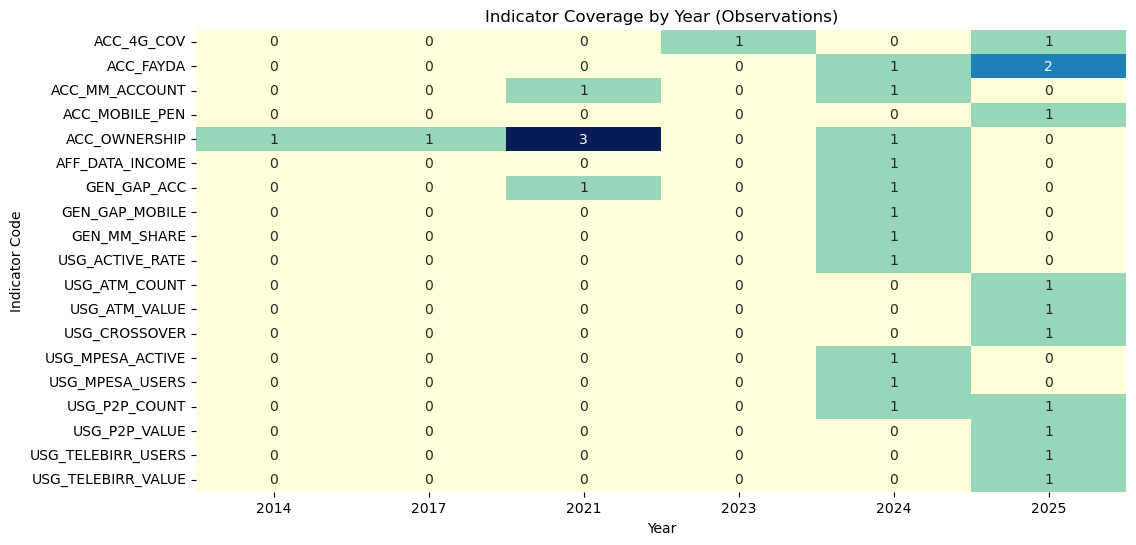

In [13]:
temporal_matrix = analyzer.get_temporal_matrix()

plt.figure(figsize=(12, 6))
sns.heatmap(temporal_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Indicator Coverage by Year (Observations)")
plt.xlabel("Year")
plt.ylabel("Indicator Code")
plt.show()

Quality and Gap Assessment

In [14]:
quality = analyzer.assess_quality()
gaps = analyzer.identify_gaps()

print(f"Confidence Level Distribution:\n{quality}")
print("\nIndicators with Sparse Data (Gaps):")
display(gaps)

Confidence Level Distribution:
confidence
high      93.333333
medium     6.666667
Name: proportion, dtype: float64

Indicators with Sparse Data (Gaps):


,total_points,latest_year
indicator_code,,
ACC_4G_COV,2,2025
ACC_MM_ACCOUNT,2,2024
ACC_MOBILE_PEN,1,2025
AFF_DATA_INCOME,1,2024
GEN_GAP_ACC,2,2024
GEN_GAP_MOBILE,1,2024
GEN_MM_SHARE,1,2024
USG_ACTIVE_RATE,1,2024
USG_ATM_COUNT,1,2025


Data Preparation & Trajectory Plotting

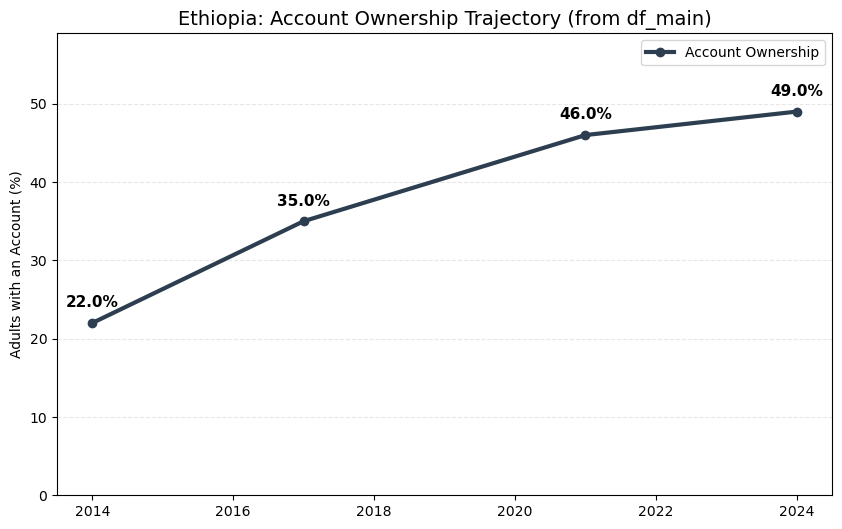

In [15]:
# Filter df_main for national Account Ownership observations
# We ensure we only take the 'all' gender and 'national' location to avoid double counting disaggregations
access_data = df_main[
    (df_main['record_type'] == 'observation') & 
    (df_main['indicator_code'] == 'ACC_OWNERSHIP') & 
    (df_main['gender'] == 'all')
].copy()

# Convert dates and sort
access_data['year'] = pd.to_datetime(access_data['observation_date']).dt.year
access_data = access_data.sort_values('year')

# Plot Trajectory
plt.figure(figsize=(10, 6))
plt.plot(access_data['year'], access_data['value_numeric'], marker='o', color='#2c3e50', linewidth=3, label='Account Ownership')
for x, y in zip(access_data['year'], access_data['value_numeric']):
    plt.text(x, y + 2, f'{y}%', ha='center', fontsize=11, fontweight='bold')

plt.title("Ethiopia: Account Ownership Trajectory (from df_main)", fontsize=14)
plt.ylabel("Adults with an Account (%)")
plt.ylim(0, max(access_data['value_numeric']) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

Growth Rate Calculation & Visualization

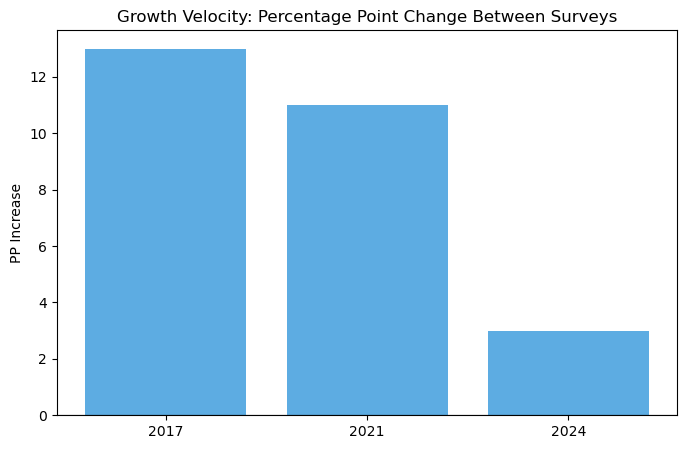

Growth Summary:
   year  value_numeric  pp_change
1  2017           35.0       13.0
2  2021           46.0       11.0
5  2024           49.0        3.0


In [16]:
# Calculate Percentage Point (PP) change
access_data['pp_change'] = access_data['value_numeric'].diff()

# Visualize Growth Rates
plt.figure(figsize=(8, 5))
plt.bar(access_data['year'].astype(str), access_data['pp_change'], color='#3498db', alpha=0.8)
plt.title("Growth Velocity: Percentage Point Change Between Surveys")
plt.ylabel("PP Increase")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

print("Growth Summary:")
print(access_data[['year', 'value_numeric', 'pp_change']].dropna())

Disaggregated Analysis (Gender & Region)

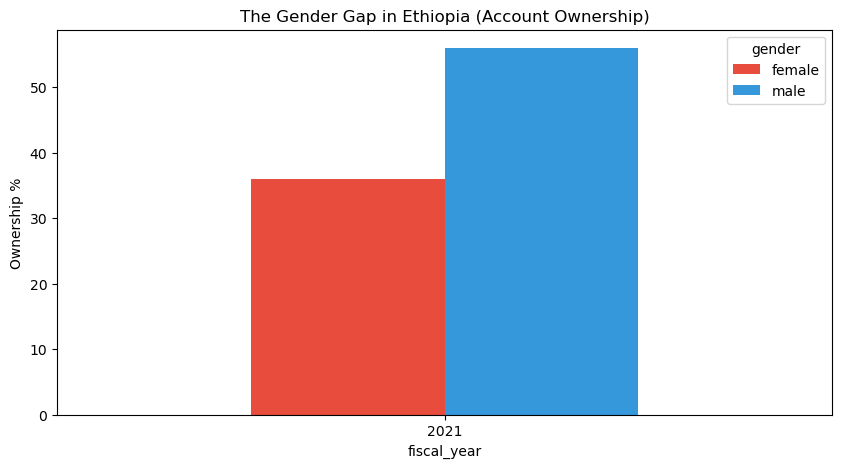

In [17]:
# Filter for 2021/2024 Gender Disaggregations
gender_data = df_main[
    (df_main['indicator_code'] == 'ACC_OWNERSHIP') & 
    (df_main['gender'].isin(['male', 'female']))
].pivot(index='fiscal_year', columns='gender', values='value_numeric')

if not gender_data.empty:
    gender_data.plot(kind='bar', figsize=(10, 5), color=['#e74c3c', '#3498db'])
    plt.title("The Gender Gap in Ethiopia (Account Ownership)")
    plt.ylabel("Ownership %")
    plt.xticks(rotation=0)
    plt.show()

In [30]:

df_main.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


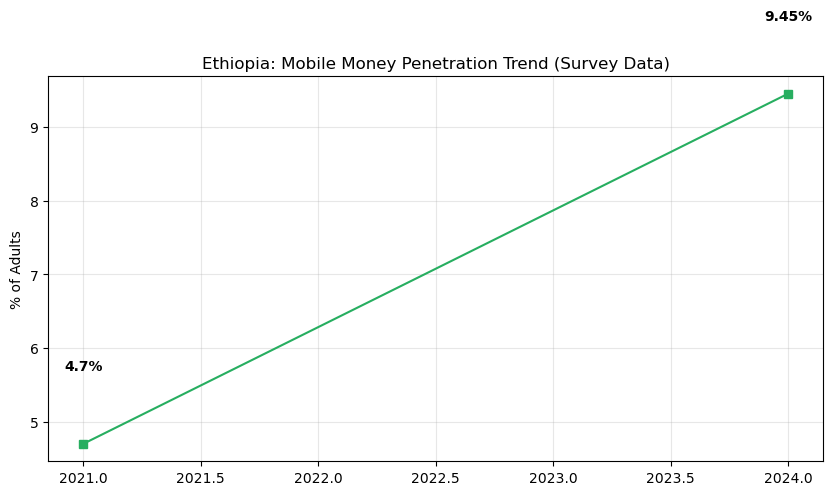

In [18]:
# Filtering for Mobile Money Penetration (indicator_code: ACC_MM_ACCOUNT)
m_money = df_main[
    (df_main['indicator_code'] == 'ACC_MM_ACCOUNT') & 
    (df_main['gender'] == 'all')
].copy()

m_money['year'] = pd.to_datetime(m_money['observation_date']).dt.year
m_money = m_money.sort_values('year')

plt.figure(figsize=(10, 5))
plt.plot(m_money['year'], m_money['value_numeric'], marker='s', color='#27ae60', label='MM Account Penetration')
for x, y in zip(m_money['year'], m_money['value_numeric']):
    plt.text(x, y + 1, f'{y}%', ha='center', fontweight='bold')

plt.title("Ethiopia: Mobile Money Penetration Trend (Survey Data)")
plt.ylabel("% of Adults")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Sample logic to compare use cases if they exist in your indicator_code list
use_cases = ['PAY_UTILITY_DIGITAL', 'RECV_WAGES_DIGITAL', 'DIGITAL_MERCHANT_PAY']
df_usage = df_main[df_main['indicator_code'].isin(use_cases)].groupby('indicator').value_numeric.mean()
df_usage.plot(kind='barh', color='#8e44ad')
plt.title("Dominant Digital Payment Use Cases (2024)")
plt.xlabel("% of Population")
plt.show()

Series([], Name: value_numeric, dtype: float64)

Digital Crossover: P2P vs. ATM

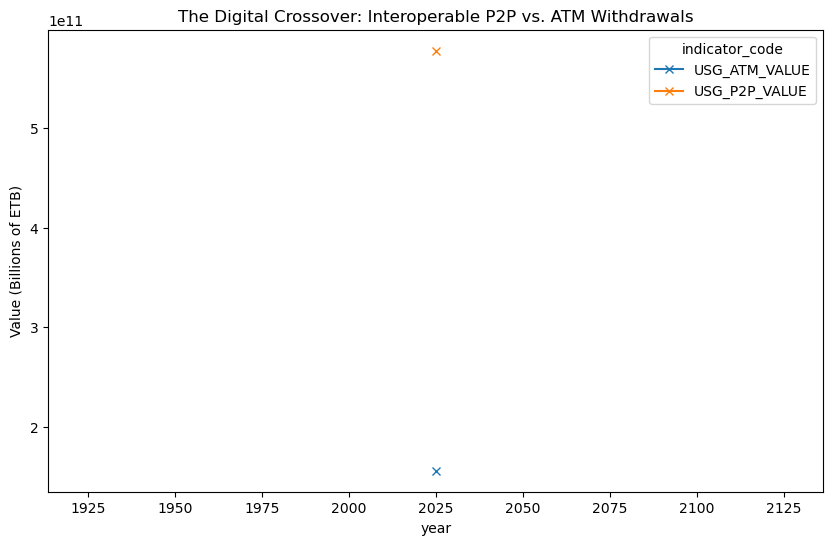

In [26]:
# Comparing USG_P2P_VALUE vs USG_ATM_VALUE
crossover_data = df_main[df_main['indicator_code'].isin(['USG_P2P_VALUE', 'USG_ATM_VALUE'])].copy()
crossover_data['year'] = pd.to_datetime(crossover_data['observation_date']).dt.year

# Pivot and plot
pivot_crossover = crossover_data.pivot_table(index='year', columns='indicator_code', values='value_numeric')
pivot_crossover.plot(kind='line', marker='x', figsize=(10, 6))
plt.title("The Digital Crossover: Interoperable P2P vs. ATM Withdrawals")
plt.ylabel("Value (Billions of ETB)")
plt.show()

Infrastructure and Enablers

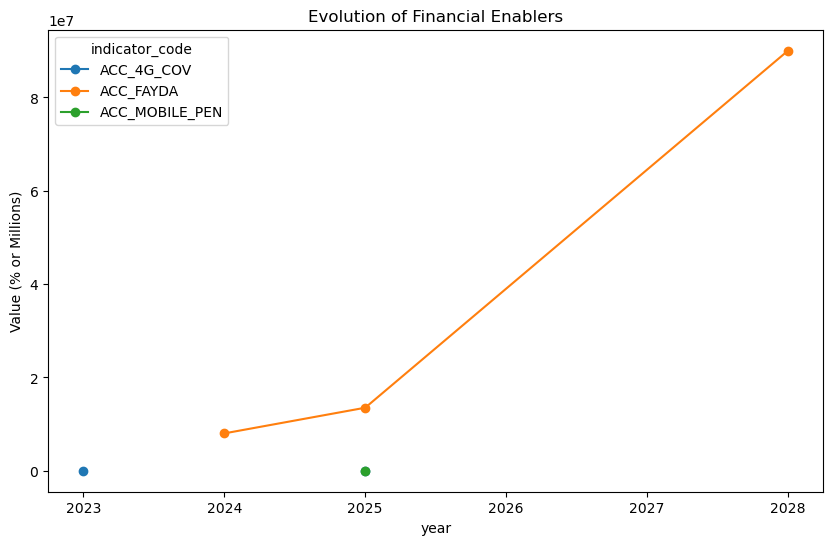

In [27]:
# Comparing Infrastructure Enablers: 4G Coverage vs Mobile Penetration
infra_codes = ['ACC_4G_COV', 'ACC_MOBILE_PEN', 'ACC_FAYDA']
df_infra = df_main[df_main['indicator_code'].isin(infra_codes)].copy()
df_infra['year'] = pd.to_datetime(df_infra['observation_date']).dt.year

# Pivot for visualization
pivot_infra = df_infra.pivot_table(index='year', columns='indicator_code', values='value_numeric')
pivot_infra.plot(kind='line', marker='o', figsize=(10, 6), title="Evolution of Financial Enablers")
plt.ylabel("Value (% or Millions)")
plt.show()

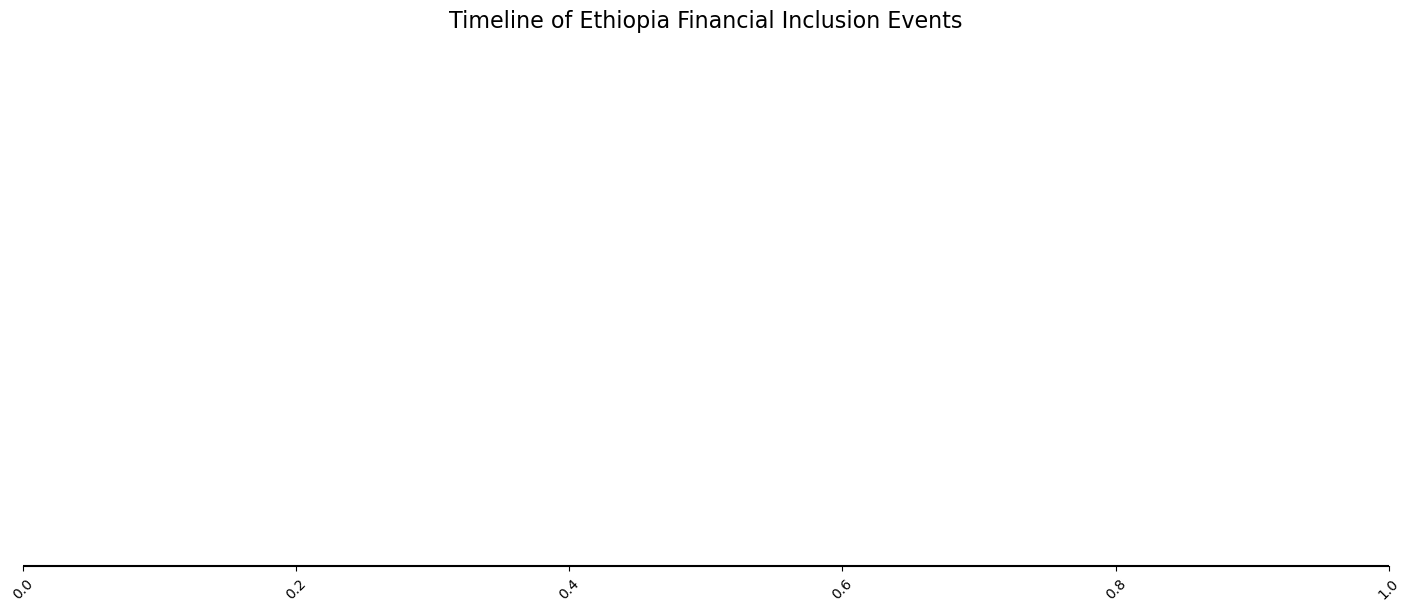

In [28]:


# 1. Clean data: Filter for events and handle missing notes
events = df_main[df_main['record_type'] == 'event'].copy()
events['observation_date'] = pd.to_datetime(events['observation_date'])
# CRITICAL FIX: Fill NaN notes with empty string to avoid 'float' error
events['notes'] = events['notes'].fillna('') 
events = events.sort_values('observation_date')

# 2. Create the timeline
fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)
ax.set_title("Timeline of Ethiopia Financial Inclusion Events", fontsize=16, pad=30)

# Create a baseline at y=0
ax.axhline(0, color="black", linewidth=1.5, zorder=1)

# 3. Plot each event with logic to avoid label clutter
for i, (date, note) in enumerate(zip(events['observation_date'], events['notes'])):
    # Alternate labels above and below the line to reduce overlap
    # We use multiple levels (1, 2, -1, -2) for better spacing
    levels = [1, 2, -1, -2]
    level = levels[i % len(levels)]
    
    # Text formatting: truncate long notes for readability
    display_text = (note[:50] + "...") if len(note) > 50 else note
    
    ax.annotate(display_text, xy=(date, 0), xytext=(date, level),
                arrowprops=dict(arrowstyle="->", color="#34495e", lw=1),
                ha='center', fontsize=9, fontweight='medium',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#34495e', alpha=0.8))

# Formatting the axis
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.show()

In [54]:
df_events = df_main[df_main["record_type"] == "event"].copy()
event_cols = [
    "record_id",
    "category",
    "pillar",
    "indicator",        # often event name/label
    "observation_date",
    "source_name",
    "notes"
]

df_events = df_events[event_cols]

df_event_impacts = df_impacts.merge(
    df_events,
    left_on="parent_id",
    right_on="record_id",
    how="left",
    suffixes=("_impact", "_event")
)

impact_summary = df_event_impacts[[
    "parent_id",
    "indicator_event",        # event name
    "indicator_impact",       # affected indicator
    "impact_direction",
    "impact_magnitude",
    "impact_estimate",
    "lag_months",
    "confidence"
]]

impact_summary = impact_summary.rename(columns={
    "parent_id": "event_id",
    "indicator_event": "event_name",
    "indicator_impact": "affected_indicator"
})

impact_agg = (
    impact_summary
    .groupby(["event_name", "affected_indicator"])
    .agg(
        avg_impact_estimate=("impact_estimate", "mean"),
        max_impact=("impact_estimate", "max"),
        impact_direction=("impact_direction", "first"),
        impact_magnitude=("impact_magnitude", "first"),
        avg_lag_months=("lag_months", "mean"),
        observations=("confidence", "count")
    )
    .reset_index()
)

print("Event Impact Aggregation Sample:")
display(impact_agg.head())

Event Impact Aggregation Sample:


,event_name,affected_indicator,avg_impact_estimate,max_impact,impact_direction,impact_magnitude,avg_lag_months,observations
0,EthioPay Instant Payment System Launch,EthioPay effect on P2P Count,15.0,15.0,increase,medium,6.0,1
1,Fayda Digital ID Program Rollout,Fayda effect on Account Ownership,10.0,10.0,increase,medium,24.0,1
2,Fayda Digital ID Program Rollout,Fayda effect on Gender Gap,-5.0,-5.0,decrease,medium,24.0,1
3,Foreign Exchange Liberalization,FX Reform effect on Data Affordability,30.0,30.0,increase,high,3.0,1
4,M-Pesa EthSwitch Integration,M-Pesa Interop effect on M-Pesa Active Users,15.0,15.0,increase,medium,3.0,1


2️⃣ Build the Event–Indicator Matrix
What we already know (from impact_agg)

Each row tells us:

When Event E happens → Indicator I changes by X, after L months, with direction D and magnitude M

Example:

EthioPay Launch → P2P Count
+15 units, increase, medium, lag = 6 months

2.1 Conceptual Modeling Decisions
🔹 1. How do we represent an event’s effect over time?

We don’t apply the impact instantly. Instead:

Event occurs at time t₀

Impact starts at t₀ + lag_months

Effect can be:

Step effect (sudden change)

Ramp effect (gradual build-up)

✅ For a first industry-style model → Ramp effect is more realistic

🔹 2. Do effects happen immediately or gradually?

Based on your data:

Infrastructure & policy → gradual

Payment systems → faster but still lagged

👉 We model effects as distributed over time

Example (simple):

Total impact = 15

Lag = 6 months

Effect spreads over next 6 months

So each month adds:
15 / 6 = 2.5 units

🔹 3. How do we combine multiple events?

For the same indicator:

Effects are additive

If directions conflict → they cancel out naturally

Example:

Net change = Event A effect + Event B effect + ...


This is standard in:

Econometrics

Policy impact modeling

Scenario simulations


2.2 Event–Indicator Matrix (Core Structure)

We create a matrix like this:

| Time  | Account Ownership | P2P Count | Data Affordability | Gender Gap |
| ----- | ----------------- | --------- | ------------------ | ---------- |
| t₀    | 0                 | 0         | 0                  | 0          |
| t₀+3  | +                 | +         | +                  | 0          |
| t₀+6  | +                 | ++        | ++                 | −          |
| t₀+12 | ++                | ++        | ++                 | −          |


In [56]:
impact_agg["signed_impact"] = impact_agg.apply(
    lambda x: x["avg_impact_estimate"]
    if x["impact_direction"] == "increase"
    else -abs(x["avg_impact_estimate"]),
    axis=1
)


In [57]:
impact_agg["effect_duration_months"] = impact_agg["impact_magnitude"].map({
    "low": 3,
    "medium": 6,
    "high": 12
})

In [58]:
rows = []

for _, row in impact_agg.iterrows():
    monthly_effect = row["signed_impact"] / row["effect_duration_months"]

    for m in range(int(row["avg_lag_months"]), 
                   int(row["avg_lag_months"] + row["effect_duration_months"])):

        rows.append({
            "event_name": row["event_name"],
            "indicator": row["affected_indicator"],
            "month_since_event": m,
            "monthly_effect": monthly_effect
        })

df_time_effects = pd.DataFrame(rows)

In [59]:
event_indicator_matrix = (
    df_time_effects
    .pivot_table(
        index="month_since_event",
        columns="indicator",
        values="monthly_effect",
        aggfunc="sum"
    )
    .fillna(0)
)


In [60]:
baseline = {
    "Fayda effect on Account Ownership": 45,
    "EthioPay effect on P2P Count": 100,
}


In [62]:
indicator_projection = event_indicator_matrix.cumsum() + pd.Series(baseline)
indicator_projection

,EthioPay effect on P2P Count,FX Reform effect on Data Affordability,Fayda effect on Account Ownership,Fayda effect on Gender Gap,M-Pesa Interop effect on M-Pesa Active Users,M-Pesa Interop effect on P2P Count,M-Pesa effect on M-Pesa Users,M-Pesa effect on Mobile Money Account Rate,Safaricom Price Hike effect on Data Affordability,Safaricom effect on 4G Coverage,Safaricom effect on Data Affordability,Telebirr effect on Account Ownership,Telebirr effect on P2P Transactions,Telebirr effect on Telebirr Users
month_since_event,,,,,,,,,,,,,,
1,100.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,102.5,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,105.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,107.5,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,110.0,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create the Association Matrix

In [63]:
indicator_map = {
    "Fayda effect on Account Ownership": "ACC_OWNERSHIP",
    "Fayda effect on Gender Gap": "GENDER_GAP",
    "EthioPay effect on P2P Count": "USG_DIGITAL_PAYMENT",
    "M-Pesa Interop effect on M-Pesa Active Users": "ACC_MM_ACCOUNT",
    "FX Reform effect on Data Affordability": "DATA_AFFORDABILITY"
}

impact_agg["indicator_std"] = impact_agg["affected_indicator"].map(indicator_map)

association_matrix = (
    impact_agg
    .pivot_table(
        index="event_name",
        columns="indicator_std",
        values="signed_impact",
        aggfunc="sum"
    )
    .fillna(0)
)
display(association_matrix)

indicator_std,ACC_MM_ACCOUNT,ACC_OWNERSHIP,DATA_AFFORDABILITY,GENDER_GAP,USG_DIGITAL_PAYMENT
event_name,,,,,
EthioPay Instant Payment System Launch,0.0,0.0,0.0,0.0,15.0
Fayda Digital ID Program Rollout,0.0,10.0,0.0,-5.0,0.0
Foreign Exchange Liberalization,0.0,0.0,30.0,0.0,0.0
M-Pesa EthSwitch Integration,15.0,0.0,0.0,0.0,0.0
